# Customer Segmentation Using ML

* Customer segmentation is the process of grouping customers by common characterstics.It is done to improve the decision making in business.
* Unsupervised ML technique called KMeans Clustering will be used.
* Unsupervised ML is used to analyze and cluster unlabeled datasets. It is used to discover hidden patterns or data grouping.
* The Goal of KMeans algorithm is to group the data into clusters that are distinct from other clusters i.e. each and every data in present in the same cluster is related to each other as well as it is non-related to data present in other clusters.



In [1]:
# for Mathematical operations
import numpy as np
# dataframe manipulations
import pandas as pd
# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # used to create graphics with colors and thick lines
# for Data analysis
import dabl


In [2]:
# importing the dataset

data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#shape of the dataset
print("Shape of the dataset :",data.shape)


Shape of the dataset : (200, 5)


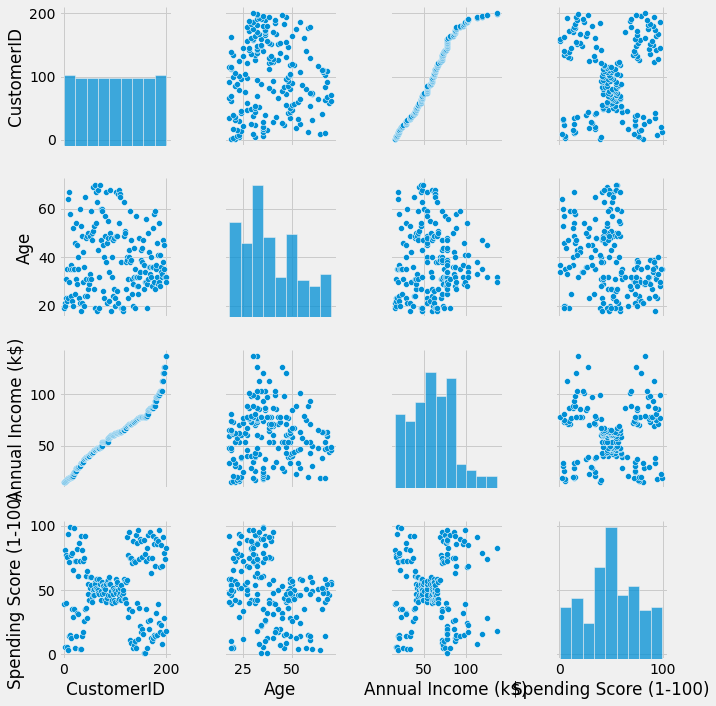

In [4]:
# pairplot for the data(Showing pairwise relationship between the data sets)
sns.pairplot(data)
plt.show()

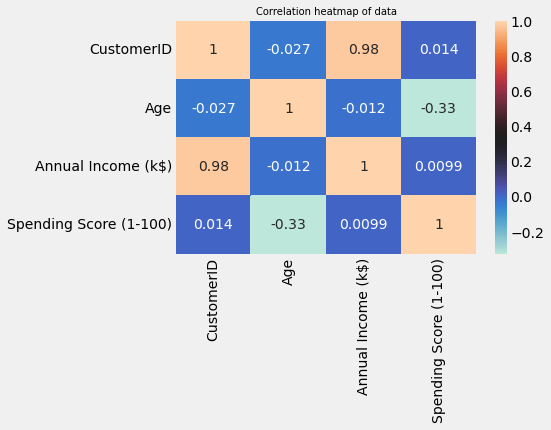

In [5]:
# correlation heat map of data
sns.heatmap(data.corr(),annot=True,cmap='icefire')
plt.title("Correlation heatmap of data",fontsize=10)
plt.show()


Target looks like regression


c:\users\hello\appdata\local\programs\python\python36\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.37E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

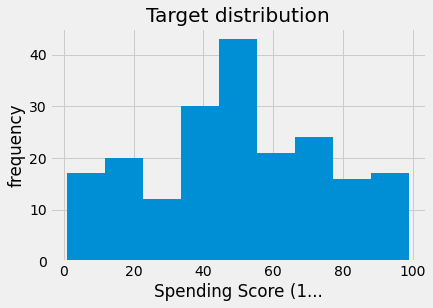

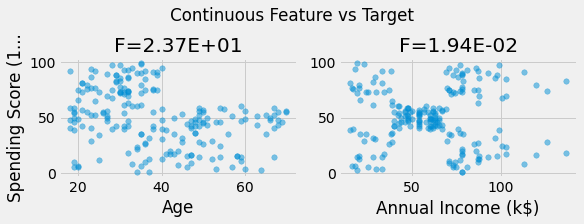

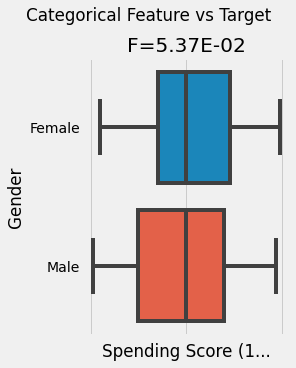

In [6]:
# analyzing the data wrt respect to spending score
dabl.plot(data,target_col='Spending Score (1-100)')

Target looks like regression


c:\users\hello\appdata\local\programs\python\python36\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.95E-02'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

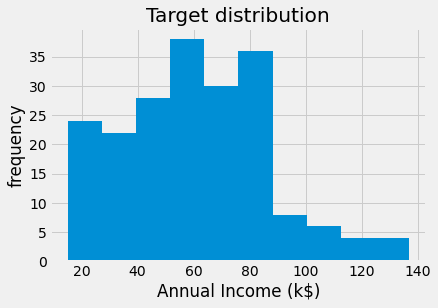

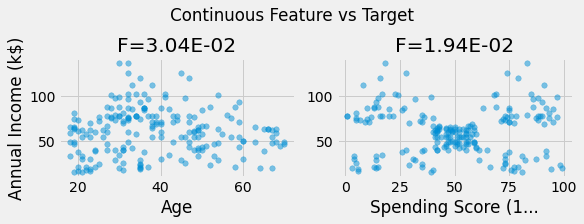

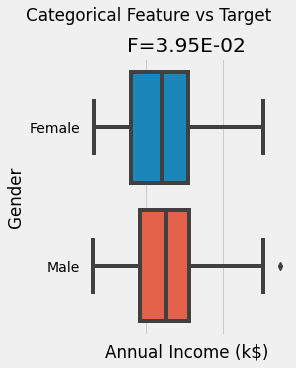

In [7]:
# anallyzing the data wrt annual income
dabl.plot(data,target_col='Annual Income (k$)')

## Descriptive Statistics


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# checking for null values
data.isnull().any().any()

False

## Data Visualization


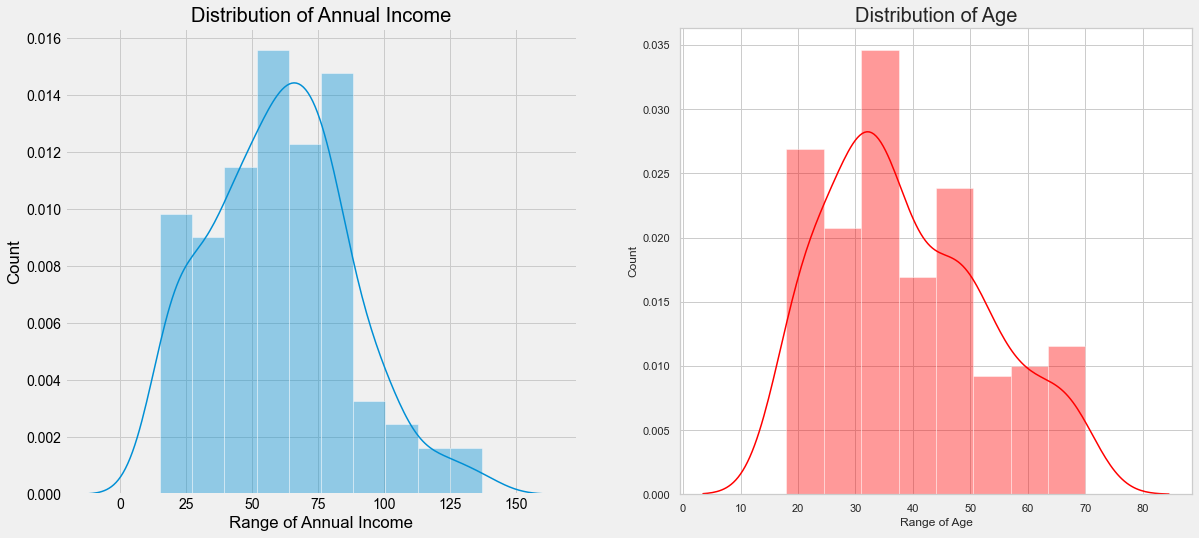

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income',fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(data['Age'],color='red')
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

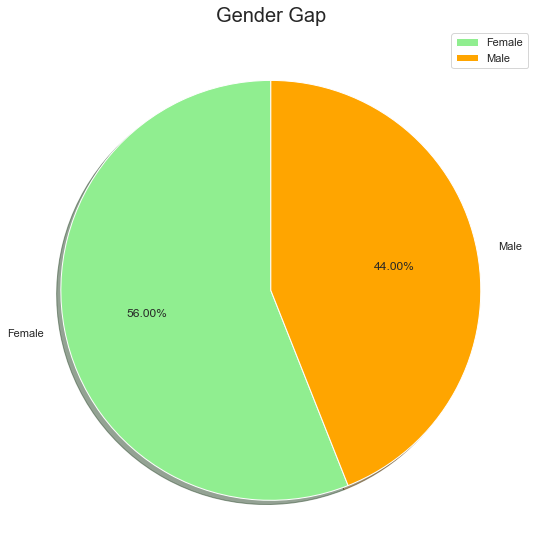

In [11]:
# Gender Gap
labels=['Female','Male']
size=data['Gender'].value_counts()
colors=['lightgreen','orange']
explode=[0,0.0001]
plt.rcParams['figure.figsize']=(9,9)
plt.pie(size,colors=colors,explode=explode,labels=labels,shadow=True,startangle=90,autopct='%.2f%%')
plt.title('Gender Gap',fontsize=20)
plt.axis('on')
plt.legend()
plt.show()

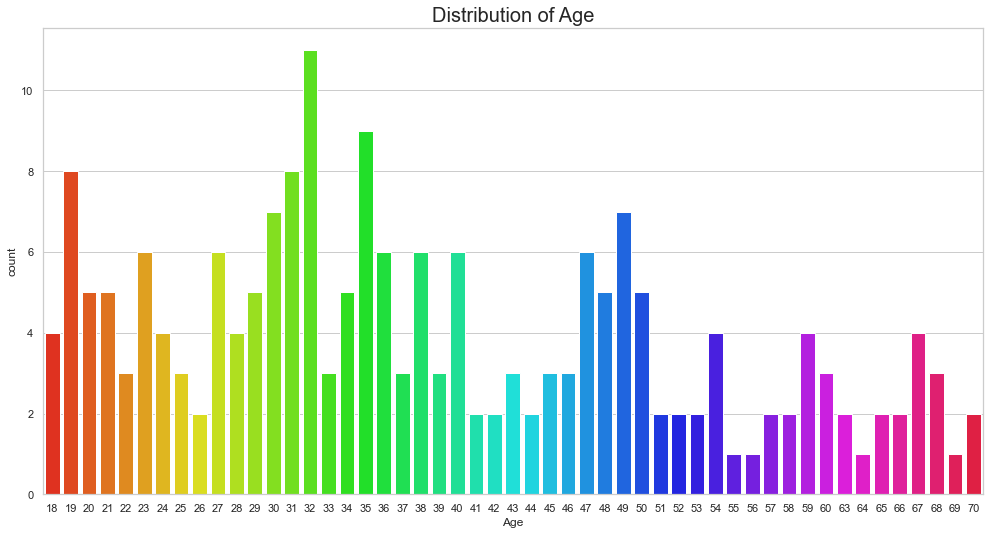

In [12]:
# Visualizing Age distribution
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(data['Age'],palette='hsv')
plt.title('Distribution of Age',fontsize=20)
plt.show()

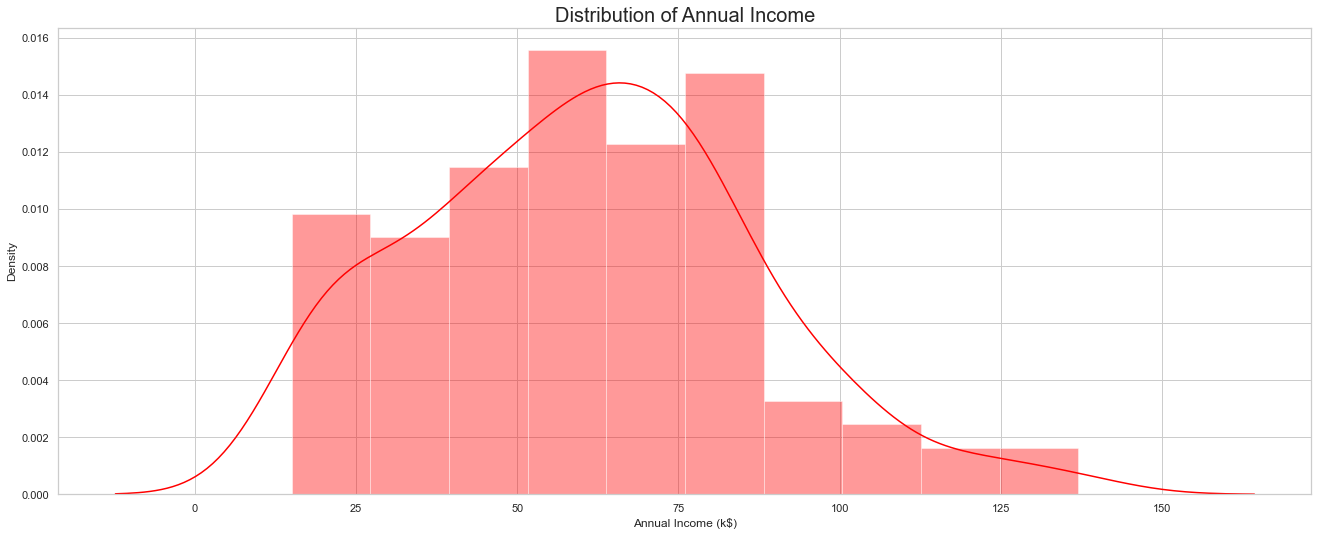

In [13]:
# Analyzing the distribution of annual Income
plt.rcParams['figure.figsize']=(20,8)
sns.distplot(data['Annual Income (k$)'],color='red')
plt.title('Distribution of Annual Income',fontsize=20)
plt.show()

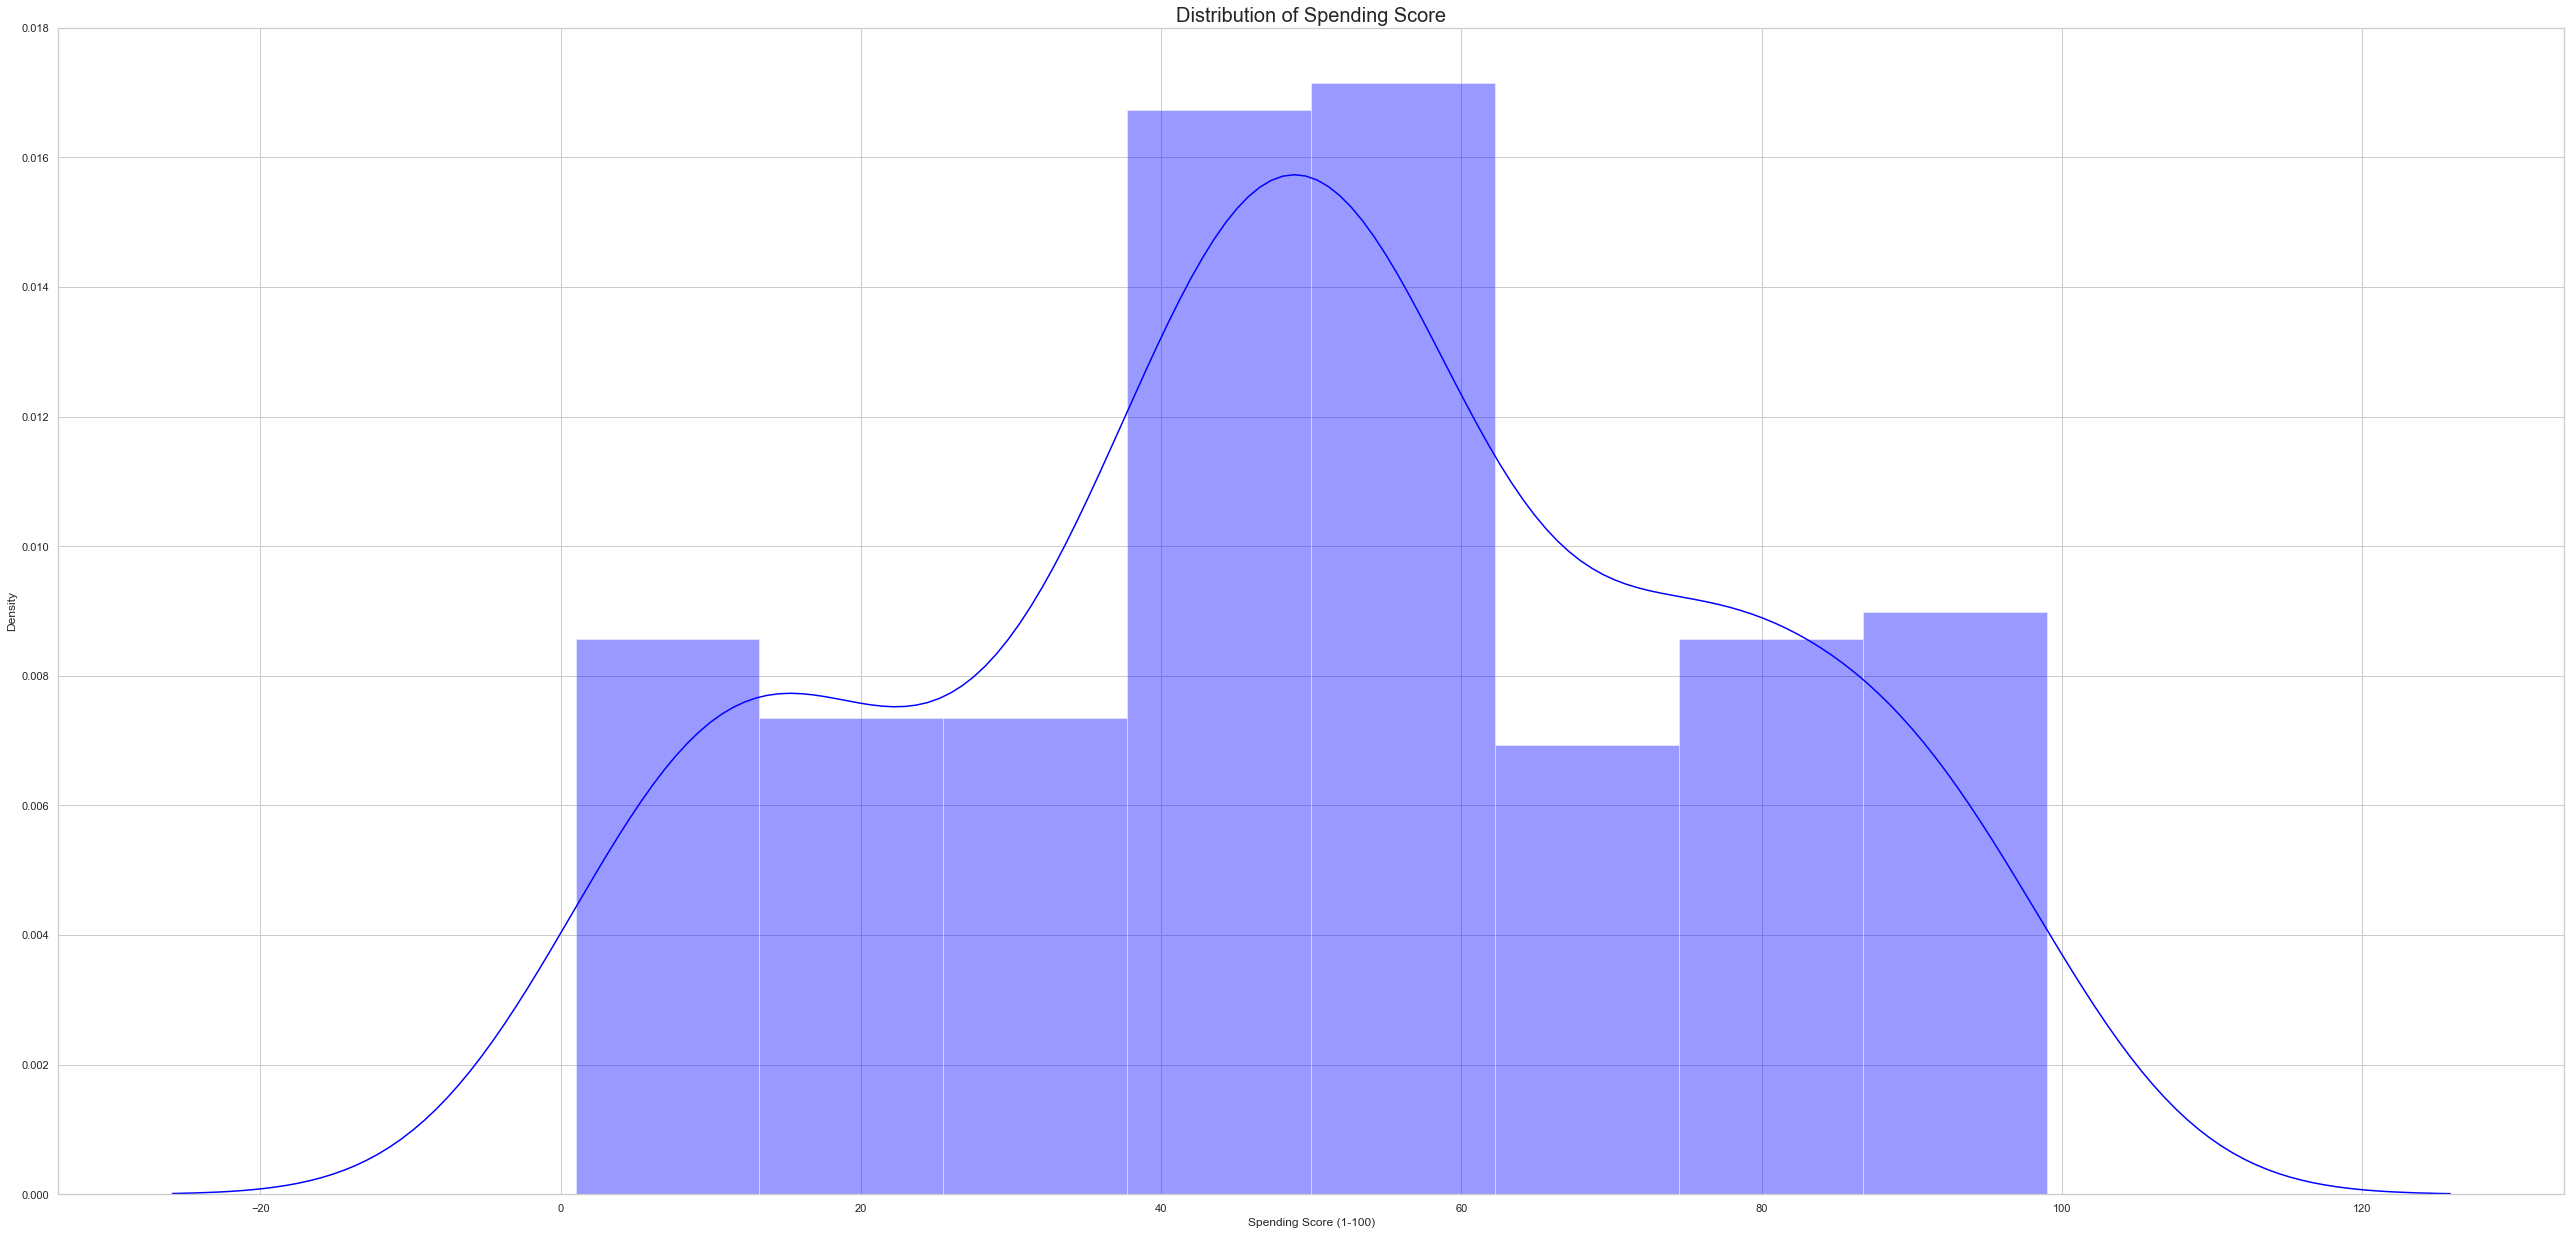

In [14]:
# distribution of Spending Score
plt.rcParams['figure.figsize']=(40,20)
sns.distplot(data['Spending Score (1-100)'],color='blue')
plt.title('Distribution of Spending Score',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Gender vs Spending Score')

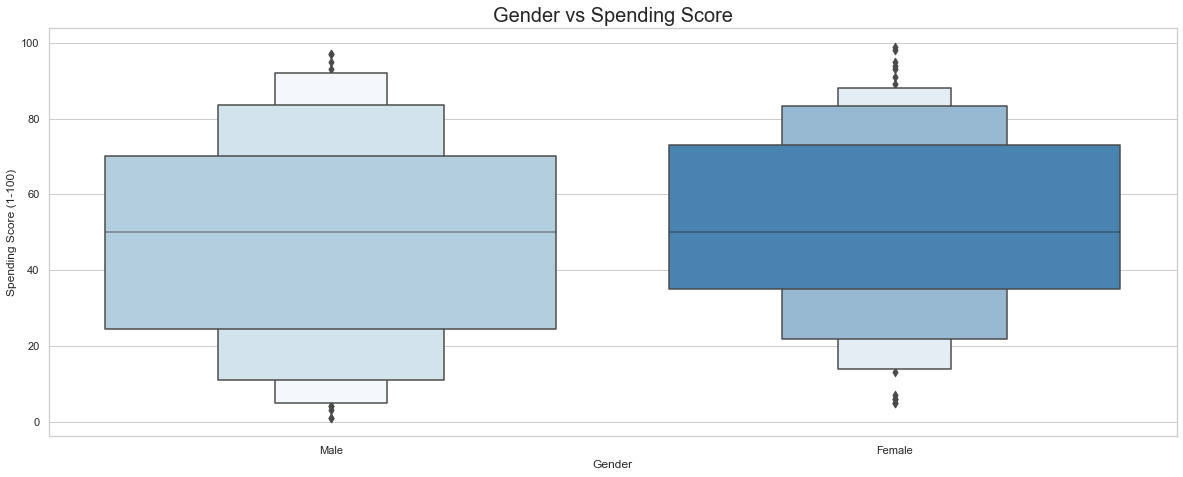

In [15]:
# Gender vs Spendscore(In boxenplot there are more quartile values)
plt.rcParams['figure.figsize']=(18,7)
sns.boxenplot(data['Gender'],data['Spending Score (1-100)'],palette='Blues')
plt.title('Gender vs Spending Score',fontsize=20)

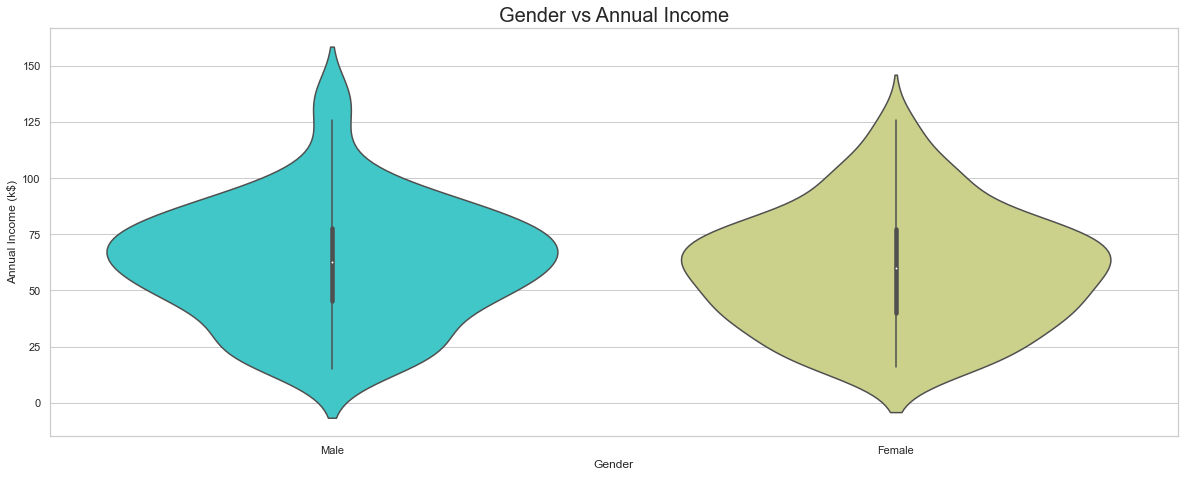

In [16]:
# Gender vs Annual Income
plt.rcParams['figure.figsize']=(18,7)
sns.violinplot(data['Gender'],data['Annual Income (k$)'],palette='rainbow')
plt.title('Gender vs Annual Income',fontsize=20)
plt.show()

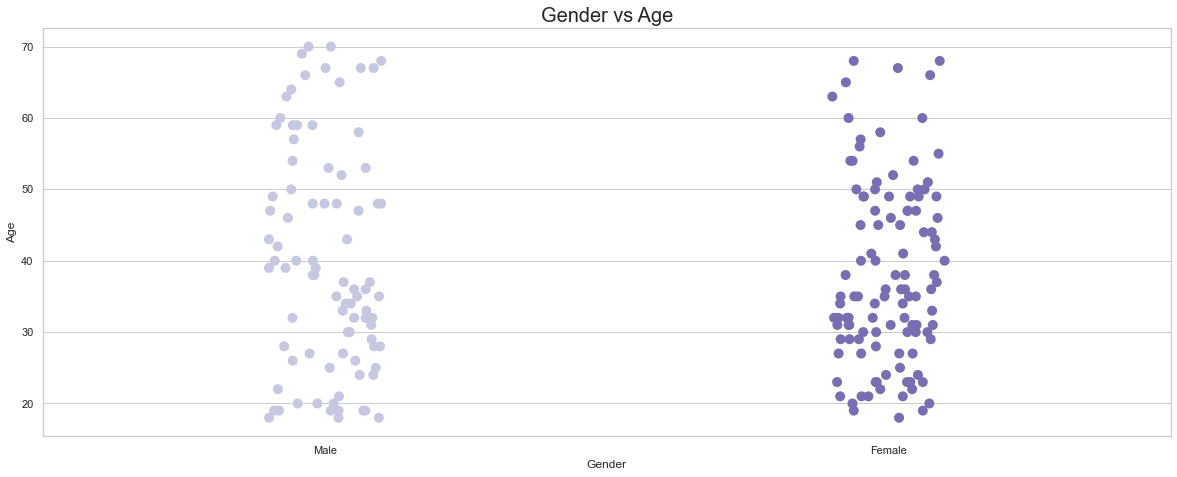

In [17]:
# Gender vs Age
plt.rcParams['figure.figsize']=(18,7)
sns.stripplot(data['Gender'],data['Age'],palette='Purples',size=10)
plt.title('Gender vs Age',fontsize=20)
plt.show()

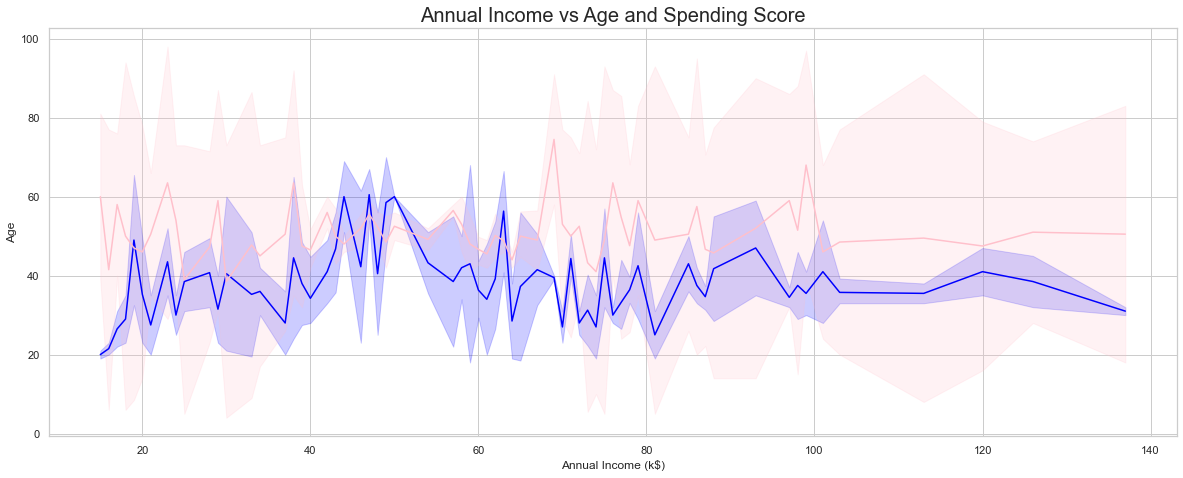

In [18]:
# Annual Income vs Age and Spending Score
x=data['Annual Income (k$)']
y=data['Age']
z=data['Spending Score (1-100)']
sns.lineplot(x,y,color='blue')
sns.lineplot(x,z,color='pink')
plt.title('Annual Income vs Age and Spending Score',fontsize=20)
plt.show()

# Clustering Analysis

In [19]:
import warnings
warnings.filterwarnings('ignore')
x=data.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
print(x.shape)

(200, 2)


In [20]:
x_data=pd.DataFrame(x)
x_data.head()
# 0-> Spending Score (1-100), 1-> Annual Income (k$)

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


# KMeans Algorithm
### Elbow method to find the No. of Optimal Clusters
* kmeans is an iterative algorithm which is used to group the data,however each data item belongs to one group


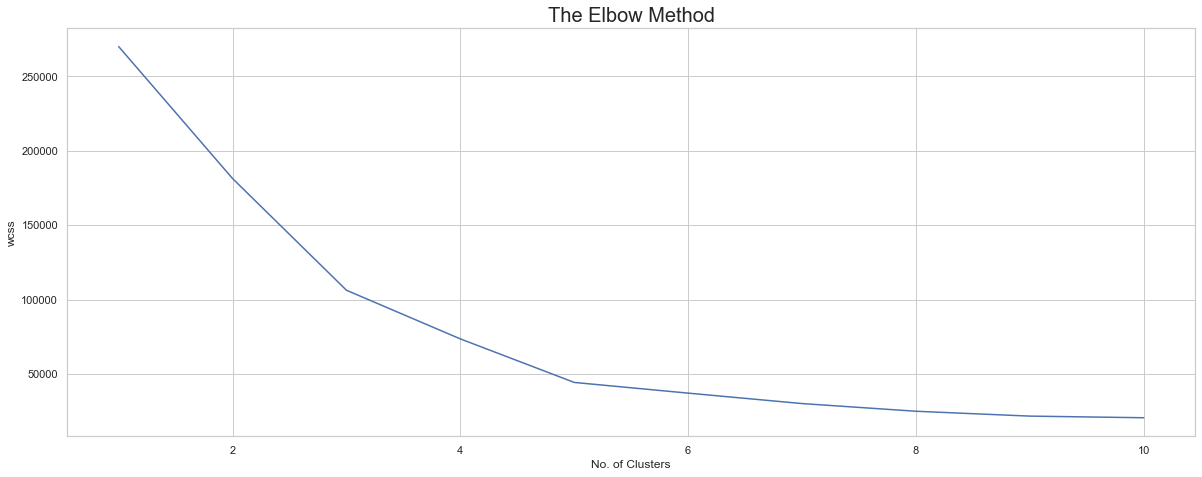

In [21]:
#wcss=will store the sum of squares of the distances of each data point in all clusters to their respective centroids
#k-means++ is used to find the center of the cluster
#max_iter is used to determine the number of iterations of the kmeans algorith for the single run
#n_init will tell us the number of times the kmeans algorithm will be run with different cluster seeds
# random_state will determine the random number generation for centroid inititialization
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

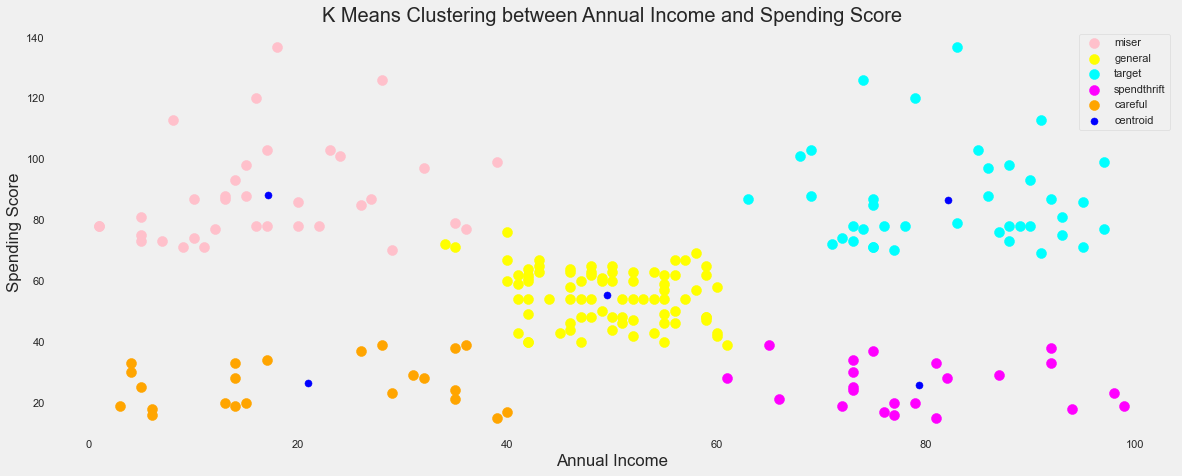

In [22]:
# Visualizing the clusters
plt.style.use('fivethirtyeight')
km=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='pink',label='miser')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='yellow',label='general')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='cyan',label='target')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='magenta',label='spendthrift')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='orange',label='careful')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


##### We found out that there are 5 distinct types of customers based on annual income and spending scores

### Clustering between Age and Spending Score

In [23]:
x=data.loc[:,['Spending Score (1-100)','Age']].values
print(x.shape)
x_data=pd.DataFrame(x)
x_data.head()
# 0-> Spending Score (1-100), 1-> Age (k$)

(200, 2)


,0,1
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


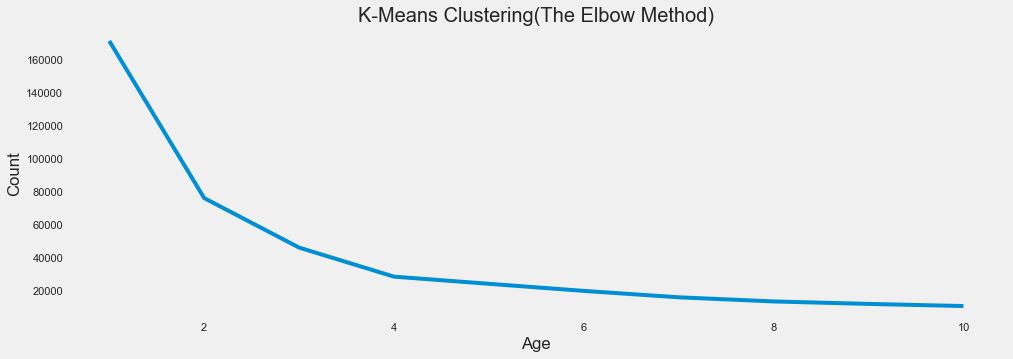

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.rcParams['figure.figsize']=(15,5)
plt.plot(range(1,11),wcss)
plt.title('K-Means Clustering(The Elbow Method)',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

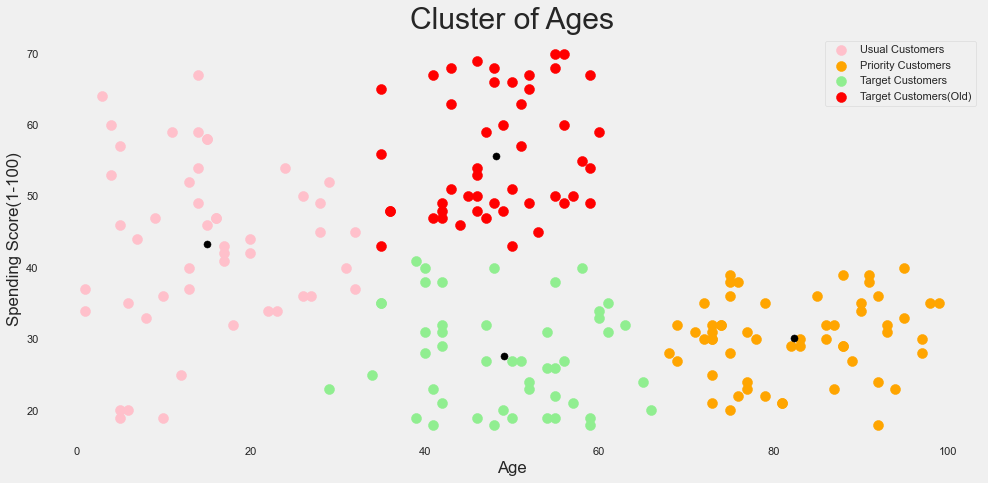

In [30]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans=kmeans.fit_predict(x)
plt.rcParams['figure.figsize']=(15,7)
plt.title('Cluster of Ages',fontsize=30)
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,c='pink',label='Usual Customers')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,c='orange',label='Priority Customers')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,c='lightgreen',label='Target Customers')
plt.scatter(x[ymeans==3,0],x[ymeans==3,1],s=100,c='red',label='Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black')
plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.grid()
plt.show()


##### We found out that there are 4 distinct types of customers based on age and spending scores